# 应用场景

SVM(Support Vector Machine)中文名是支持向量机,是一种常见的分类方法,在机器学习中,是有监督学习模型的一种.

# 原理概念

## 有监督学习&无监督学习

有监督学习是指在已有类别标签的情况下,将样本数据进行分类,比如已告知机器哪个是红球哪个是蓝球让其把混杂一堆的红蓝球分开.  
无监督学习是指在无类别标签的情况下,样本数据根据一定的方法进行分类,即聚类,分类号的类别需要进一步分析后,从而得知每个类别的特点,比如机器需要自己学习什么是红球什么是蓝球然后再对混杂一堆的红蓝球进行分类.

## 超平面

![](./img/SVM之超平面1.png)

![](./img/SVM之超平面2.jpg)

我们的目标是把红蓝球分开.通过比较以上两张图,上图表示用一条曲线实现分类目标.但我们希望两者可以自然分开.  
想象一个场景,猛拍一下桌子,使得上图呈现出下图的模样.  
于是,二维平面变成了三维空间,而原来的曲线变成了一个平面.  
这个平面就是**超平面**  
**SVM算法的计算过程就是帮助我们找出超平面的过程,这个超平面就是我们的SVM分类器.**

如果我们把红蓝两种颜色的球放到一个三维空间中,发现决策面就变成了一个平面.用线性函数来表示,如果在一维空间里就表示一个点,在二维空间里表示一条直线,在三维空间中代表一个平面,当然空间维数还可以更多.我们给这个线性函数起个名字就叫"超平面",表达公式如下:

$$
g(x)=w^Tx+b , 其中w,x∈R^n
$$

w,x是n维空间里的向量,其中x是函数变量,w是法向量.法向量这里指的是垂直于平面的直线所表示的向量,决定了超平面的方向.  

## 分类间隔

![](./img/SVM之分类间隔.jpg)

图中A,B,C三条线都可以实现分类目标,区别是A线更靠近红球,在真实环境下,如果红球再多些,也可能被误认为是篮球.B线同理.相比于A线和B线,C线的划分更优,其健壮性更优.于是我们把分类的问题转化为寻找直线C的过程.实际分类环境其实是在多维空间中,这样直线C就变成了决策面C.  
在保证决策面不变,且分类不产生错误的情况下,移动决策面C,直到产生两个极限位置:如图中的决策面A和决策面B.极限位置是指越过这个位置就会产生分类错误.两个极限位置A和B之间的分界线C就是最有决策面.极限位置到最有决策面C之间的距离就是**分类间隔(margin)**

转动最有决策面可以得到多个最优决策面,这些决策面都能把数据集正确分开,但它们的分类间隔可能是不同的,而那个拥有最大间隔的决策面就是SVM要找的最优解

超平面将不同的样本划分开,同时使得样本集中的点到这个分类超平面的最小距离(即分类间隔)最大化.在这个过程中,支持向量就是离分类超平面最近的样本点,实际上如果确定了支持向量也就确定了这个超平面.  
所以说,SVM就是求解最大分类间隔的过程.

我们定义某类样本集到超平面的距离是这个样本集合内的样本到超平面的最短距离.用di代表点xi到超平面wxi+b=0的欧氏距离.于是问题转化为求解di的最小值,用它来代表这个样本到超平面的最短距离.di的表达公式为:

$$
d_i=\frac{|wx_i+b|}{||w||}
$$

||w||为超平面的范数,di的公式可以用解析几何知识进行推导.

## 硬间隔,软间隔

如果数据是完全线性可分的,那么学习模型可以称为硬间隔支持向量机.换句话说,硬间隔就是完全分类准确,不能存在分类错误的情况.而软间隔是允许一定量的样本分类错误.  
实际工作中的数据没那么"干净",或多或少都会存在一些噪点.所以线性可分是个理想情况.所以实际工作中往往需要使用软间隔SVM,即近似线性可分,如下图所示:

![](./img/SVM之软间隔.jpg)

## 核函数

如果数据集是非线性的该如何分类呢?如下图所示:

![](./img/SVM之核函数.jpg)

图中的两类数据,分别分布为两个圆圈的形状.这种情况下,不论多高级的分类器,只要映射函数是线性的就没法处理.这时需要用到核函数.
核函数可以将样本从原始空间映射到一个更高维的特质空间中,使得样本在新的空间中线性可分.  
这样我们可以使用原来的推导来进行计算,只是所有的推导是新的空间,而 不是在原来的空间中进行.

最常用的核函数有线性核,多项式核,高斯核,拉普拉斯核,sigmoid核,或者这些核函数的组合.这些函数的区别在于映射方式的不同.通过这些核函数我们就可以把样本空间投射到新的高维空间中.

另外,SVM本身是一个二值分类器,最初是为二分类问题设计的,也就是yes或no.实际上我们要解决的问题可能是多分类的情况,比如对文本进行分类或者对图像进行识别.针对这种情况,我们可以将多个二分类器组合起来形成一个多分类器,常见的方法有"一对多法"和"一对一法"两种.

# 工具介绍

在Python的sklearn工具包中有SVM算法,其既可以做回归,也可以做分类器.  
当SVM做回归的时候,可以使用SVC或者LinearSVC.SVC的英文是Support Vector Classification.  
LinearSVC是个线性分类器,用于处理线性可分的数据,只能使用线性核函数.针对非线性数据,需要用到SVC.  
在SVC中我们既可以使用到线性核函数(进行线性划分),也能使用高维的核函数(进行非线性划分).

## 如何创建一个SVM分类器

SVC的构造函数:model=svm.SVC(kernel='rbf',C=1.0,gamma='auto') .其中有三个重要参数kernel,C和gamma.

### 参数kernel

kernel代表核函数的选择,它有四种选择,默认rbf,即高斯核函数.  
- linear:线性核函数  
在数据线性可分的情况下使用,速度快效果好,但不能处理线性不可分数据.
- poly:多项式核函数  
可将数据从低维空间映射到高维空间,但参数较多,计算量大
- rbf:高斯核函数(默认)  
同样可将数据从低维映射到高维,但相比于多项式来说所需参数较少,通用性强.
- sigmoid:sigmoid核函数  
sigmoid经常用在神经网络的映射中,当使用sigmoid核函数时,SVM实现的是多层神经网络.

### 参数C

代表目标函数的惩罚系数.惩罚系数指的是分错样本时的惩罚程度,默认情况下为1.0.当C越大的时候,分类器的准确性越高,但同样容错率会越低,泛化能力会变差;反之,C越小,泛化能力越强的,但准确性会降低.

### 参数gamma

代表核函数的系数,默认为样本特征数的倒数,即gamma=1/n_features

# 项目流程

## 问题描述

医疗人员采集了患者乳腺肿块经过细针穿刺(FNA)后数字化图像,并且对这些数字图像进行了特征提取,这些特征可以描述图像中的细胞核呈现.肿瘤可分为良性和恶性.

## 关键流程

![](./img/SVM之项目流程示意图.png)

### 数据获取

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
# 加载数据集
data = pd.read_csv('./data/breast_cancer_data.csv')

数据表共包含32个字段,代表含义如下:

![](./img/SVM之项目流程参数说明表.jpg)

每张图像都计算了响应的特征,有30个特征值(除ID字段和分类标识结果字段diagnosis),实际上是10个特征值的3个维度,即平均,标准差和最大值.这些特征值都保留了4位数字.字段那种没有缺失值.在569个患者中,一共有357个是良性,212个是恶性.

### 数据探索

In [3]:
# 数据探索
# 因为数据集中列比较多,我们需要把dataframe中的列全部显示出来
pd.set_option('display.max_columns', None)
print(data.columns)
print(data.head(5))
print(data.describe())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42

### 数据清洗

运行结果中,在32个字段里,id没有实际含义可以去掉.diagnosis字段取值为B或M,可以用0和1替代.其余30个字段,其中可以分成三组字段,下划线后面的mean,se和worst代表了每组字段不同的度量方式.

In [4]:
# 将特征字段分成3组
features_mean = list(data.columns[2:12])
features_se = list(data.columns[12:22])
features_worst = list(data.columns[22:32])
# 数据清洗
# ID列没用,删除
data.drop('id', axis=1, inplace=True)
# 将B良性替换为0,M恶性替换为1
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

### 特征选择

通过观察features_mean各变量间的关系,我们可以使用DataFrame的corr()函数,然后用热力图进行可视化呈现

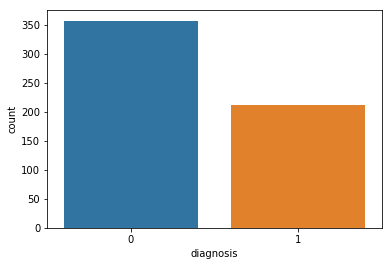

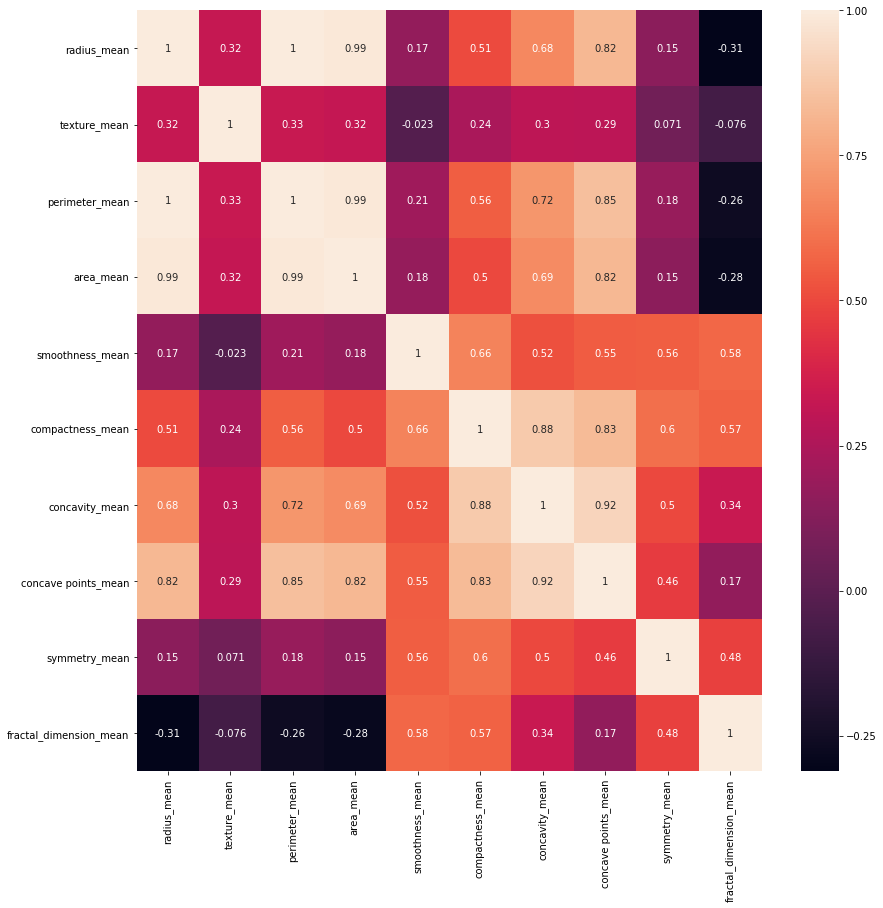

In [5]:
# 将肿瘤诊断结果可视化
sns.countplot(data['diagnosis'], label='Count')
plt.show()
# 用热力图呈现features_mean字段之间的相关性
corr = data[features_mean].corr()
plt.figure(figsize=(14, 14))
# annot=True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

热力图中对角线上的是单变量自身的相关系数1.颜色越浅代表相关性越大.  
可以看出radius_mean,perimeter_mean和area_mean相关性非常大,compactness_mean,concavity_mean,concave_points_mean这三个字段你也是相关的.我们取其中一个作为代表.

**特征选择目的是降维,用少量的特征代表数据的特性,同时增强分类器的泛化能力,避免数据过拟合.**

mean,se,worst这三组特征是对同一组内容的不同度量方式,可以保留mean组,忽略se和worst.同时,在mean这组特征中,radius_mean,perimeter_mean,area_mean这三个属性相关性大,compactness_mean,daconacavity_mean,concave points_mean这三个属性相关性大,可分别从这2类中选择1个属性作为代表,比如radius_mean和compactness_mean.  
这样的话,我们就把原来的10个属性缩减为6个属性了.

In [6]:
# 特征选择
features_remain = [
    'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
    'symmetry_mean', 'fractal_dimension_mean'
]

In [34]:
# 抽取30%的数据作为测试集,其余作为训练集
train, test = train_test_split(data, test_size=0.3)
# 抽取特征选择数值作为训练和测试数据
train_x = train[features_remain]
train_y = train['diagnosis']
test_x = test[features_remain]
test_y = test['diagnosis']

In [35]:
# 对数据进行规范化,避免因为维度问题造成数据误差
# 采用Z-Scores规范化数据,保证每个特征维度的数据均值为0,方差为1
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

In [36]:
# 创建SVM分类器
model = svm.SVC()
# 用训练集做训练
model.fit(train_x, train_y)
# 用测试集做测试
prediction = model.predict(test_x)
print('准确率:', metrics.accuracy_score(prediction, test_y))

准确率: 0.941520467836


### 要点总结

sklearn为我们提供了很好的工具,让我们无需关心中间的运算细节,但正因为这样,我们更需要对每个流程熟练掌握,通过实战项目训练数据化思维和对数据的敏感.